<a href="https://colab.research.google.com/github/mrcrchln/Machine-Learning/blob/main/Deep_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3

The assignment 3 contains 1 question and the due date is May 16th (Tuesday) 23:59PM. If you have trouble in installing tensorflow in your computer, you may consider using Google Colab for this assignment.

## Question 1 Cat people or dog people? (100 points)

The whole cats versus dogs saga has been going on forever. It's an age-old debate, a tale as old as time, a common icebreaker on first meeting. "Are you a cat person or a dog person?"


The terms dog people and cat people refer to a person's domesticated pet animal preference. Through research completed at research institutions, it was found that there were differences in character and behaviour between dog and cat people. It was also found that some people base a significant portion of their identity around their affinity for either cats or dogs. This builds on the perceived dichotomy between cats and dogs as pets in society. A new survey says that your pet preference may actually say a lot about your personality and your lifestyle, down to your favorite exercises and your annual income.

![cat_dog](https://assets.smoothradio.com/2017/42/dog-person-cat-person-quiz-1508430737-list-handheld-0.jpg)


In this question, you will be asked to make classifications between cat and dog images.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import tensorflow_datasets as tfds
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Let's first load the `cats_vs_dogs` dataset from [tensorflow dataset ](https://www.tensorflow.org/datasets/catalog/cats_vs_dogs):

In [ ]:
(ds_train, ds_test), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incomplete02K965/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [ ]:
ds_info

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.0',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_path=PosixGPath('/tmp/tmpyqp0qfx3tfds'),
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=689.64 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=8>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul, Jared},
  

In [ ]:
import io
from PIL import Image

def is_valid_jpeg(image_data):
    try:
        Image.open(io.BytesIO(image_data)).verify()
    except (IOError, SyntaxError):
        return False
    return True

def preprocess(image, label):
    def wrapped_is_valid_jpeg(image):
        valid = is_valid_jpeg(tf.image.encode_jpeg(image).numpy())
        return tf.constant(valid, dtype=tf.bool)

    valid = tf.py_function(wrapped_is_valid_jpeg, [image], tf.bool)

    image = tf.cond(valid,
                    lambda: tf.image.resize(image, [224, 224]),
                    lambda: tf.zeros([224, 224, 3], dtype=tf.float32))

    image = tf.cast(image, tf.float32) / 255.0
    return image, label


ds_train = ds_train.map(preprocess).batch(32)
ds_test = ds_test.map(preprocess).batch(32)

We visualize some random images from the dataset below:

(32, 224, 224, 3)


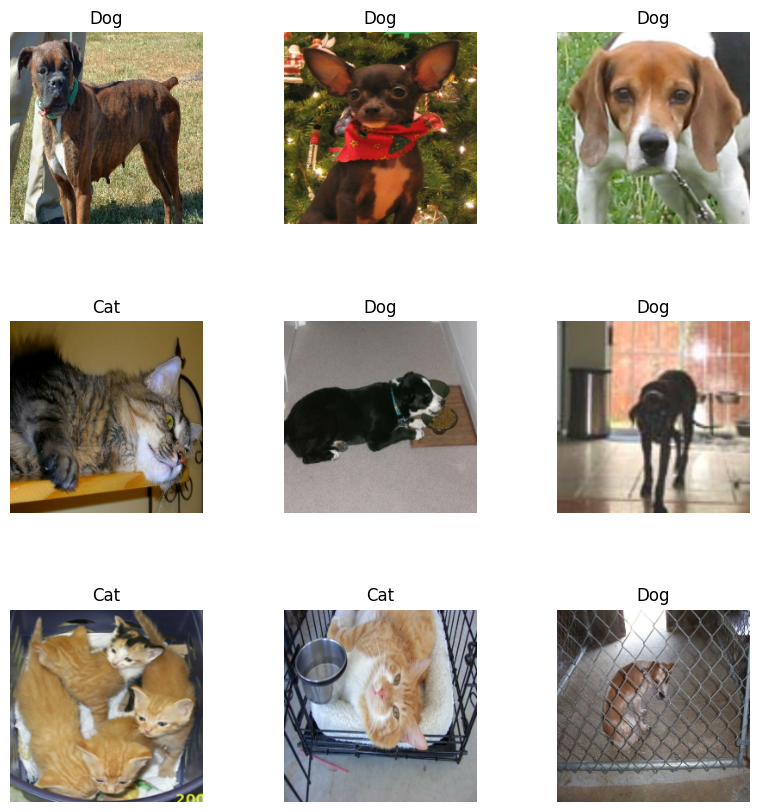

In [ ]:
import matplotlib.pyplot as plt

def visualize_images(ds_train, num_images=9):
    ds_train_iter = iter(ds_train)
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))
    axes = axes.ravel()

    batch_images, batch_labels = next(ds_train_iter)
    print(batch_images.shape)
    for i in range(num_images):
        image = batch_images[i].numpy()
        image = np.squeeze(image)
        label = batch_labels[i].numpy()
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title('Dog' if label else 'Cat', fontsize=12)

    plt.subplots_adjust(hspace=0.5)
    plt.show()

visualize_images(ds_train)


### Question 1.1 Training a deep neural network (15 points)

Practice training a deep neural network on the cats_vs_dogs image dataset


Build a Deep Neural Network (DNN) with 20 hidden layers of 100 neurons each (that’s too many, but it’s the point of this question), using the RELU activation function.

Using Adam optimization, train the network on the dataset. Donot forget define your input and output layers.

Train the model for 100 epochs and use test set as the validation data during the training, explain how many parameters does the model have and whether the model will experience overfitting. You may consider plotting the losses and accuracy over epochs.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 20)                3010580   
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dense_3 (Dense)             (None, 20)                420       
                                                                 
 dense_4 (Dense)             (None, 20)                420       
                                                                 
 dense_5 (Dense)             (None, 20)                4

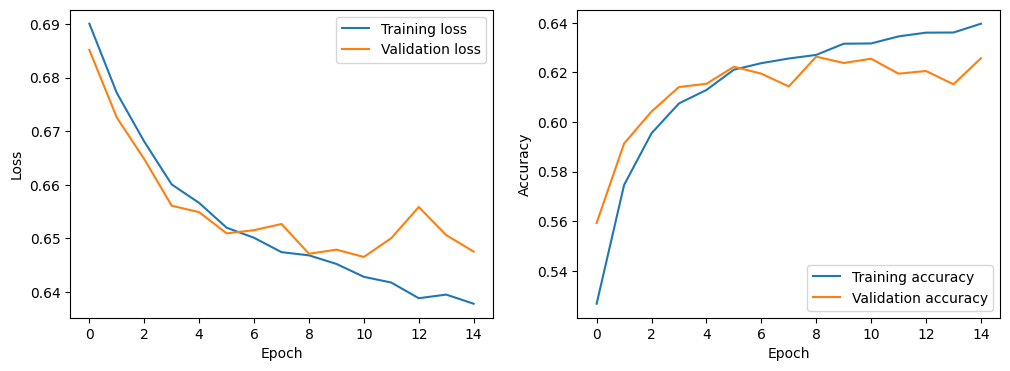

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Input(shape=(224, 224, 3)))
model.add(layers.Flatten())

for _ in range(20):
    model.add(layers.Dense(20, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

original_history = model.fit(ds_train,
                             epochs=15,
                             validation_data=ds_test)


# Plot the loss and accuracy over epochs
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(original_history.history['loss'], label='Training loss')
plt.plot(original_history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(original_history.history['accuracy'], label='Training accuracy')
plt.plot(original_history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Test dataset ds_test with labels
y_test = ds_test.map(lambda image, label: label)

# Extract the labels and convert to a NumPy array
y_test = np.concatenate(list(y_test.as_numpy_iterator()))

# Generate predictions on the test set
y_pred = model.predict(ds_test)
y_pred = (y_pred > 0.5)  # convert probabilities to binary labels

# Ensure dimensions match
y_pred = y_pred[:len(y_test)]  # Make sure y_pred and y_test have the same length

# Convert y_pred to a NumPy array
y_pred = y_pred.astype(np.int)

146/146 [==============================] - 14s 95ms/step


In [ ]:
# Evaluate the model on the test set
results = model.evaluate(ds_test)
print('Test loss:', results[0])
print('Test accuracy:', results[1])

# Generate and print confusion matrix
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))

# Generate and print classification report
print('Classification report:')
print(classification_report(y_test, y_pred))

146/146 [==============================] - 14s 93ms/step - loss: 0.6475 - accuracy: 0.6258
Test loss: 0.6475304961204529
Test accuracy: 0.6257523894309998
Confusion matrix:
[[1214 1066]
 [ 675 1697]]
Classification report:
              precision    recall  f1-score   support

           0       0.64      0.53      0.58      2280
           1       0.61      0.72      0.66      2372

    accuracy                           0.63      4652
   macro avg       0.63      0.62      0.62      4652
weighted avg       0.63      0.63      0.62      4652



The total params as stated in the ouput: 15,244,901

The training loss continues to decrease while the validation loss starts to increase clearly indicates overfitting. Similarly, the training accuracy keeps improving while the validation accuracy decreases, which suggests overfitting.

### Question 1.2 (35 points)

Try reduce the overfitting and improve the model performance. You can try the bag of tricks to the model from the class. This may include one or more techniques such as **weight regularization**, **batch normalization**, **dropout**, **Early stopping**, etc. You should perform ``ablation study``, a common techniqued used in machine learning community to show the effectivess of the introduced technique. In other words, show your step-by-step improvement by including these techniques and repeat the repeat the previous training process. Explain whether and how these techniques help achieve a better result. You may consider stopping improving the model by making it at least 10% better than the previous model architecture.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_model():
    model = models.Sequential()
    model.add(layers.Input(shape=(224, 224, 3)))
    model.add(layers.Flatten())

    for _ in range(20):
        model.add(layers.Dense(100, activation='relu'))

    model.add(layers.Dense(1, activation='sigmoid'))
    return model

# Original Model: model from 1.1

# Ablation Study

techniques = {
    "Weight Regularization": True,
    "Batch Normalization": True,
    "Dropout": True,
    "Early Stopping": True
}

results = {}

for technique, active in techniques.items():
    model = build_model()

    if active:
        if technique == "Weight Regularization":
            model.add(layers.Dense(50, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
        elif technique == "Batch Normalization":
            model.add(layers.Dense(50, activation='relu'))
            model.add(layers.BatchNormalization())
        elif technique == "Dropout":
            model.add(layers.Dense(50, activation='relu'))
            model.add(layers.Dropout(0.5))
        elif technique == "Early Stopping":
            early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
            history = model.fit(ds_train,
                                epochs=20,
                                validation_data=ds_test,
                                callbacks=[early_stopping])
            results[technique] = history.history
            continue

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(ds_train,
                        epochs=20,
                        validation_data=ds_test)

    results[technique] = history.history

# Plotting Results

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(original_history.history['loss'], label='Original Training loss')
plt.plot(original_history.history['val_loss'], label='Original Validation loss')

for technique, history in results.items():
    plt.plot(history['loss'], label=f'{technique} Training loss')
    plt.plot(history['val_loss'], label=f'{technique} Validation loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(original_history.history['accuracy'], label='Original Training accuracy')
plt.plot(original_history.history['val_accuracy'], label='Original Validation accuracy')

for technique, history in results.items():
    plt.plot(history['accuracy'], label=f'{technique} Training accuracy')
    plt.plot(history['val_accuracy'], label=f'{technique} Validation accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Epoch 1/20
582/582 [==============================] - 88s 139ms/step - loss: 3.4468 - accuracy: 0.0000e+00 - val_loss: 3.4640 - val_accuracy: 0.0000e+00
Epoch 2/20
582/582 [==============================] - 74s 128ms/step - loss: 3.3438 - accuracy: 0.0000e+00 - val_loss: 3.4043 - val_accuracy: 0.0000e+00
Epoch 3/20
582/582 [==============================] - 81s 140ms/step - loss: 3.3024 - accuracy: 0.0000e+00 - val_loss: 3.3721 - val_accuracy: 0.0000e+00
Epoch 4/20
582/582 [==============================] - 75s 129ms/step - loss: 3.2787 - accuracy: 0.0000e+00 - val_loss: 3.3521 - val_accuracy: 0.0000e+00
Epoch 5/20
582/582 [==============================] - 80s 138ms/step - loss: 3.2635 - accuracy: 0.0000e+00 - val_loss: 3.3387 - val_accuracy: 0.0000e+00
Epoch 6/20
582/582 [==============================] - 77s 133ms/step - loss: 3.2530 - accuracy: 0.0000e+00 - val_loss: 3.3291 - val_accuracy: 0.0000e+00
Epoch 7/20
582/582 [==============================] - 70s 121ms/step - loss: 3.245

In [ ]:
# Evaluate the model on the test set
results = model.evaluate(ds_test)
print('Test loss:', results[0])
print('Test accuracy:', results[1])

# Generate predictions on the test set
y_pred = model.predict(ds_test)
y_pred = (y_pred > 0.5)  # convert probabilities to binary labels

# Generate and print confusion matrix
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))

# Generate and print classification report
print('Classification report:')
print(classification_report(y_test, y_pred))

### Question 1.3 Convolutional Neural Network (25 points)

Now, let's define the Convolutional Neural Network.

❓ **Question** ❓ Define a CNN that is composed of:
- a Conv2D layer with 32 filters, a kernel size of (3, 3), the relu activation function, and a padding equal to `same`
- a MaxPooling2D layer with a pool size of (2, 2)
- a Conv2D layer with 64 filters, a kernel size of (3, 3), the relu activation function, and a padding equal to `same`
- a MaxPooling2D layer with a pool size of (2, 2)
- a Conv2D layer with 128 filters, a kernel size of (3, 3), the relu activation function, and a padding equal to `same`
- a MaxPooling2D layer with a pool size of (3, 3)
- a Flatten layer
- a dense function with 120 neurons with the `relu` activation function
- a dense function with 60 neurons with the `relu` activation function
- a dropout layer (with a rate of 0.5), to regularize the network
- a dense function related to your task

Estimate the model and report your test accuracy. Is it better than the multi-layer perceptron.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

# Define CNN architecture
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(60, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='sigmoid')
])

# Compile model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display summary
cnn_model.summary()

# Train the model
early_stopping_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = cnn_model.fit(ds_train, epochs=100, validation_data=ds_test, callbacks=[early_stopping_callback])

# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluate the model
test_loss, test_accuracy = cnn_model.evaluate(ds_test)
print(f"Test accuracy: {test_accuracy:.4f}")

### Question 1.4 Transfer learning (20 points)

In this question, we will use the [VGG-16 Neural Network](https://neurohive.io/en/popular-networks/vgg16/), a well-known architecture that has been trained on ImageNet which is a very large database of images of different categories. In a nutshell, this architecture has already learnt kernels which are supposed to be good not only for the task it has been train on but maybe for other tasks.

The idea is that first layers are not specialized for the particular task it has been trained on; only the last ones are. Therefore, we will load the existing VGG16 network, remove the last fully connected layers, replace them by new connected layers (whose weights are randomly set), and train these last layers on a specific classification task - here, separate types of flower. The underlying idea is that the first convolutional layers of VGG-16, that has already been trained, corresponds to filters that are able to extract meaning features from images. And you will only learn the last layers for your particular problem.

❓ **Question** ❓ Write a first function `load_model()` that loads the pretrained VGG-16 model from `tensorflow.keras.applications.vgg16`. Especially, look at the [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16) to load the model where:
- the `weights` have been learnt on `imagenet`
- the `input_shape` corresponds to the input shape of any of your images - you have to resize them in case they are not of the same size
- the `include_top` argument is set to `False` in order not to load the fully-connected layers of the VGG-16 without the last layer which was specifically trained on `imagenet`

Write a function that takes the previous model as input the set the girst layers to be non-trainable, by applying `model.trainable = False`. Then check-out the summary of the model to see that now, the parameters are `non-trainable`. Then write a function that adds flattening and dense layers after the first convolutional layers. You can define each layer (or group of layers) separately and concatenate them using the classic `layers.Sequential()` like below:

```
model = tf.keras.Sequential([
  base_model,
  flattening_layer,
  dense_layer,
  prediction_layer
])
```

Replicate the above steps by adding a flattening and two dense layers (the first with 500 neurons) to the previous VGG-16 model.

Estimate the model and report the accuracy and loss achieved. Explain whether model would benefit from transfer lerarning in comparison to the previous model architectures.

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model

def load_base_model(input_shape):
    base_model = VGG16(weights='imagenet', input_shape=input_shape, include_top=False)
    return base_model

def set_base_model_trainable(model):
    model.trainable = True
    return model

def create_final_model(base_model, num_classes):
    x = Flatten()(base_model.output)
    x = Dense(500, activation='relu')(x)
    predictions = Dense(num_classes, activation='sigmoid')(x)

    final_model = Model(inputs=base_model.input, outputs=predictions)
    return final_model

input_shape = (224, 224, 3)
num_classes = 2

# Load the base VGG-16 model
base_model = load_base_model(input_shape)

# Set the base model layers to be trainable
base_model = set_base_model_trainable(base_model)

# Create the final model with additional layers
final_model = create_final_model(base_model, num_classes)

# Compile the model
final_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
final_model.summary()

# Train the model
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)
history = final_model.fit(ds_train, epochs=2, validation_data=ds_test, callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = final_model.evaluate(ds_test)
print(f"Test accuracy: {test_accuracy:.4f}")

### Question 1.5 Model Inference (5 points)

Now let's try to use the best model you trained from the preivous steps to make the predictions on dog and cat images. If you have not heared about generative AI, now it is time to try. Go to stable diffusion online (https://stablediffusionweb.com/) and try to generate some images.

Go to stable diffusion playground, and enter prompt as text input and click the generate images. Your prompt should contain the word of 'cat' and 'dog' and with at least 10 words (e.g. `a cat lying on the bench and sleeping on the Mars `). Each time you should be able to generate 4 images. Get 4 dog images and 4 cat images repectively and use the trained model to make the prediction, show your accuracy.



In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

from google.colab import drive
drive.mount('/content/drive/')

# Best trained model is the final_model variable from before
best_model = final_model

def load_and_preprocess_images(image_directory):
    images = []
    for filename in os.listdir(image_directory):
        img_path = os.path.join(image_directory, filename)
        img = image.load_img(img_path, target_size=(224, 224))
        img_data = image.img_to_array(img)
        img_data = preprocess_input(img_data)
        images.append(img_data)

    return np.array(images)

def predict_image_classes(model, images):
    predictions = model.predict(images)
    class_predictions = np.argmax(predictions, axis=1)
    return class_predictions

# Load and preprocess the images
os.chdir('/content/drive/MyDrive/T4/ML assignment 3/ImagesStableDif')
image_directory = os.getcwd()
images = load_and_preprocess_images(image_directory)

# Predict the classes
class_predictions = predict_image_classes(best_model, images)

# Print the predictions
print("Predicted classes:", class_predictions)

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def load_and_preprocess_images(image_directory):
    images = []
    for filename in os.listdir(image_directory):
        img_path = os.path.join(image_directory, filename)
        img = image.load_img(img_path, target_size=(224, 224))
        img_data = image.img_to_array(img)
        images.append(img_data)

    return np.array(images)

original_images = load_and_preprocess_images(image_directory)

def visualize_images(images, num_images=8):
    fig, axes = plt.subplots(2, 4, figsize=(15, 7))
    axes = axes.ravel()

    for i in range(num_images):
        image = images[i] / 255.0  # Convert from [0, 255] to [0, 1]
        image = np.squeeze(image)
        axes[i].imshow(image)
        axes[i].axis('off')

    plt.subplots_adjust(wspace=0.5)
    plt.show()

# Visualize the images
visualize_images(original_images)